# Bibliotecas necessárias

In [1]:
!pip install windrose

In [2]:
from windrose import WindroseAxes, plot_windrose
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import os

sns.set_theme(rc={'figure.figsize':(16, 9)})
plt.style.use('seaborn-v0_8-bright')

import warnings
warnings.filterwarnings("ignore")

# Importação dos Dados

In [3]:
path = "/content/drive/MyDrive/Monografia/Dados Paranaguá/P2MOD/P2MOD_GridLike.parquet"

p2mod_gridlike = pd.read_parquet(path)

p2mod_visualization = p2mod_gridlike[['Datetime',
                                      'ODAS_Corrente_Velocidade 1 [m/s]',
                                      'ODAS_Meteorologia_Velocidade do Vento [m/s]',
                                      'Cattalini_Corrente_Velocidade 1 [m/s]',
                                      'Cattalini_Meteorologia_Velocidade do Vento [m/s]',
                                      'Cattalini_Maregrafo_Altura [m]',
                                      'Porto_Maregrafo_Altura [m]',
                                      'Porto_Astronomica_Altura [m]',
                                      'Porto_Harmonico_SSH [m]']]

p2mod_visualization.columns = ['Datetime',
                               'Bóia ODAS - Corrente',
                               'Bóia ODAS - Meteorologia',
                               'Cattalini - Corrente',
                               'Cattalini - Meteorologia',
                               'Cattalini - Marégrafo',
                               'Porto de Paranaguá - Marégrafo',
                               'Porto de Paranaguá - Maré Astronômica',
                               'Porto de Paranaguá - Maré Harmônica',
                               ]

path = "/content/drive/MyDrive/Monografia/Dados Paranaguá/P2MOD/PARQUET"

p2mod = {}

for file in os.listdir(path):
    if file.endswith('.parquet'):
        df = pd.read_parquet(os.path.join(path, file))
        p2mod[file.split('.')[0]] = df

In [4]:
start_analysis = pd.to_datetime("2020-01-09 00:00:00", utc=True)
end_analysis = pd.to_datetime("2020-01-23 00:00:00", utc=True)

# Bóia ODAS - Correntômetro

In [5]:
odas_corrente = p2mod['ODAS_Corrente'].copy()
filtered_odas_corrente = odas_corrente[(odas_corrente["Datetime"] >= start_analysis) & (odas_corrente["Datetime"] < end_analysis)]

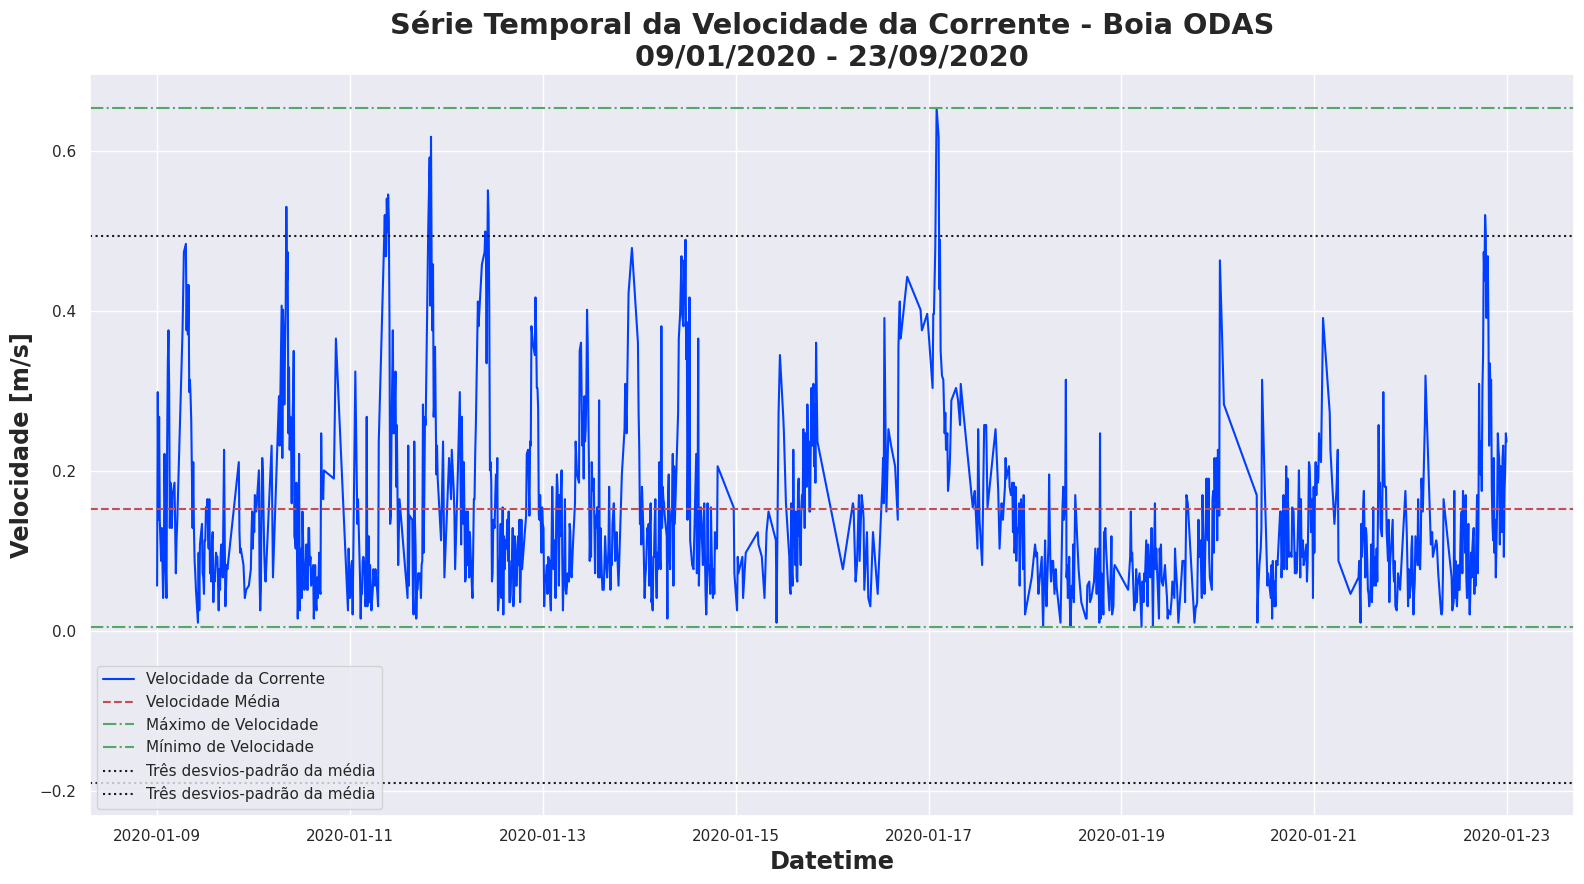

In [6]:
plt.plot(filtered_odas_corrente['Datetime'],
         filtered_odas_corrente['Velocidade 1 [m/s]'],
         label="Velocidade da Corrente")
plt.axhline(y=filtered_odas_corrente['Velocidade 1 [m/s]'].mean(),
            color='r', linestyle='--', label="Velocidade Média")
plt.axhline(y=filtered_odas_corrente['Velocidade 1 [m/s]'].max(),
            color='g', linestyle='-.', label="Máximo de Velocidade")
plt.axhline(y=filtered_odas_corrente['Velocidade 1 [m/s]'].min(),
            color='g', linestyle='-.', label="Mínimo de Velocidade")
plt.axhline(y=filtered_odas_corrente['Velocidade 1 [m/s]'].mean() + 3 * filtered_odas_corrente['Velocidade 1 [m/s]'].std(),
            color='k', linestyle=':', label="Três desvios-padrão da média")
plt.axhline(y=filtered_odas_corrente['Velocidade 1 [m/s]'].mean() -3 * filtered_odas_corrente['Velocidade 1 [m/s]'].std(),
            color='k', linestyle=':', label="Três desvios-padrão da média")

plt.xlabel('Datetime', fontsize='x-large', fontweight='bold')
plt.ylabel('Velocidade [m/s]', fontsize='x-large', fontweight='bold')
plt.title('Série Temporal da Velocidade da Corrente - Boia ODAS\n09/01/2020 - 23/09/2020', fontsize='xx-large', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('Velocidade-ODAS-Corrente.pdf')
plt.show()

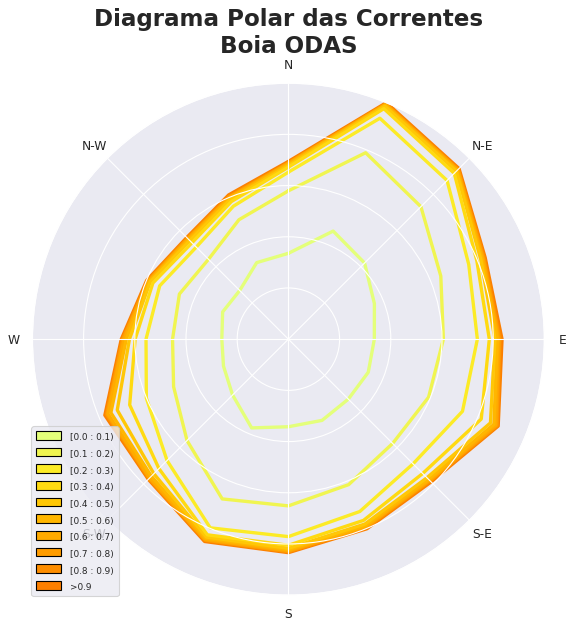

In [7]:
cs = odas_corrente['Velocidade 1 [m/s]'].to_numpy()
cd = odas_corrente['Direção 1 [°N]'].to_numpy()

df = pd.DataFrame({"speed": cs, "direction": cd})
plot_windrose(df, kind="contour", bins=np.arange(0, 1, 0.1), cmap=cm.get_cmap('Wistia'), lw=3)  # Use the colormap object

# Remover os textos do eixo radial (valores de magnitude)
plt.gca().set_yticklabels([])

# Ajustar o título
plt.title("Diagrama Polar das Correntes\nBoia ODAS", fontsize='xx-large', fontweight='bold')

# Ajustar layout e mostrar
plt.savefig("Polar-ODAS-Corrente.pdf")
plt.tight_layout()
plt.show()

# Bóia ODAS - Meteorologia

In [8]:
odas_meteorologia = p2mod['ODAS_Meteorologia'].copy()
filtered_odas_meteorologia = odas_meteorologia[(odas_meteorologia["Datetime"] >= start_analysis) & (odas_meteorologia["Datetime"] < end_analysis)]

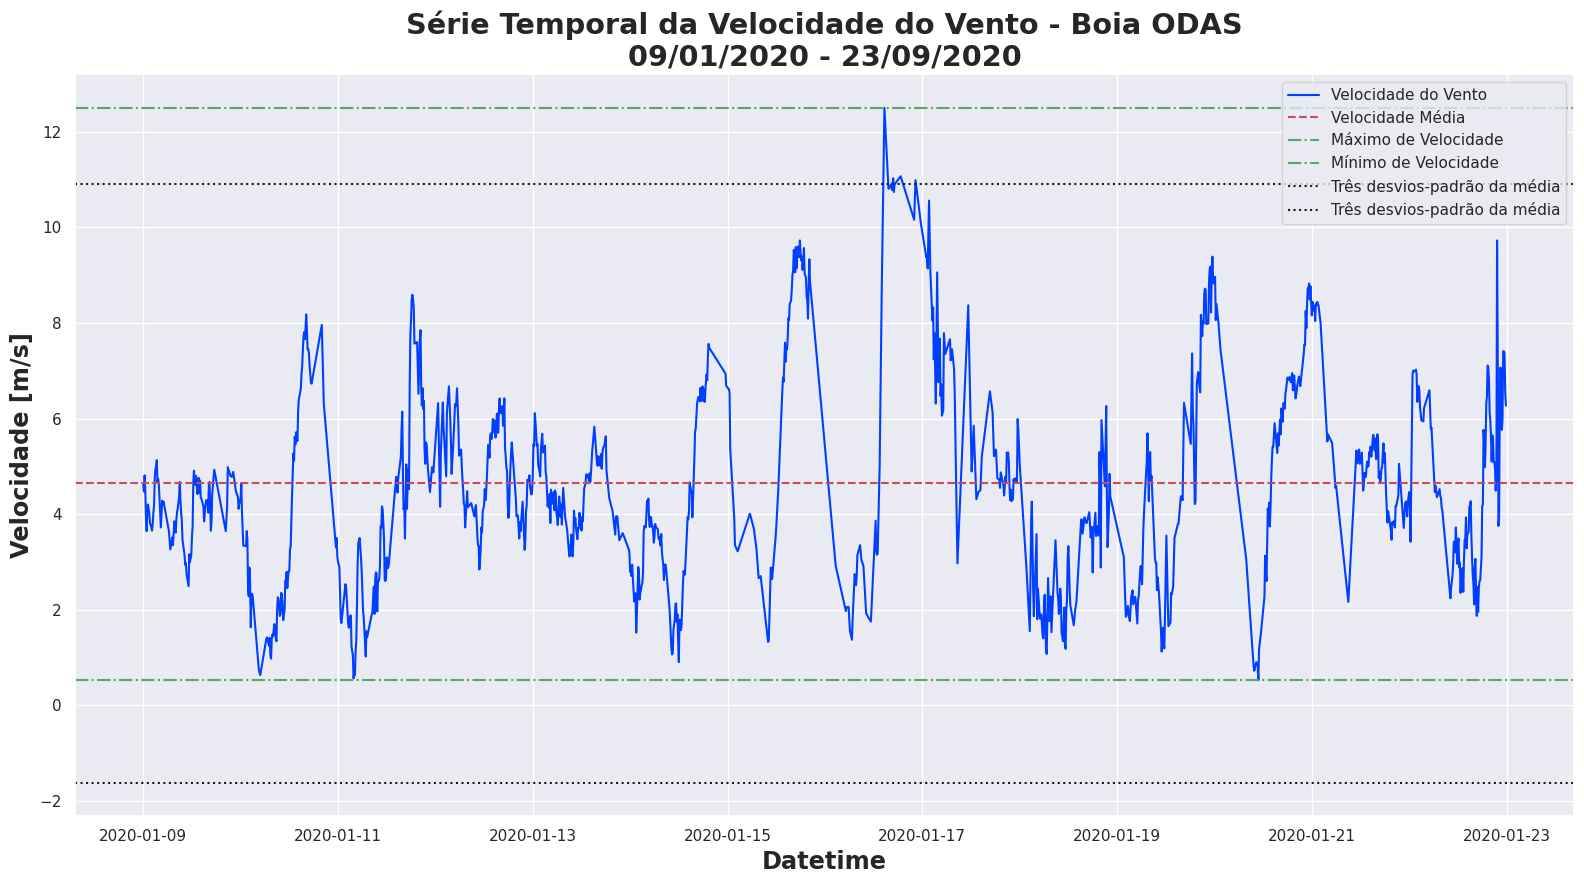

In [9]:
plt.plot(filtered_odas_meteorologia['Datetime'],
         filtered_odas_meteorologia['Velocidade do Vento [m/s]'],
         label="Velocidade do Vento")
plt.axhline(y=filtered_odas_meteorologia['Velocidade do Vento [m/s]'].mean(),
            color='r', linestyle='--', label="Velocidade Média")
plt.axhline(y=filtered_odas_meteorologia['Velocidade do Vento [m/s]'].max(),
            color='g', linestyle='-.', label="Máximo de Velocidade")
plt.axhline(y=filtered_odas_meteorologia['Velocidade do Vento [m/s]'].min(),
            color='g', linestyle='-.', label="Mínimo de Velocidade")
plt.axhline(y=filtered_odas_meteorologia['Velocidade do Vento [m/s]'].mean() + 3 * filtered_odas_meteorologia['Velocidade do Vento [m/s]'].std(),
            color='k', linestyle=':', label="Três desvios-padrão da média")
plt.axhline(y=filtered_odas_meteorologia['Velocidade do Vento [m/s]'].mean() -3 * filtered_odas_meteorologia['Velocidade do Vento [m/s]'].std(),
            color='k', linestyle=':', label="Três desvios-padrão da média")

plt.xlabel('Datetime', fontsize='x-large', fontweight='bold')
plt.ylabel('Velocidade [m/s]', fontsize='x-large', fontweight='bold')
plt.title('Série Temporal da Velocidade do Vento - Boia ODAS\n09/01/2020 - 23/09/2020', fontsize='xx-large', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('Velocidade-ODAS-Meteorologia.pdf')
plt.show()

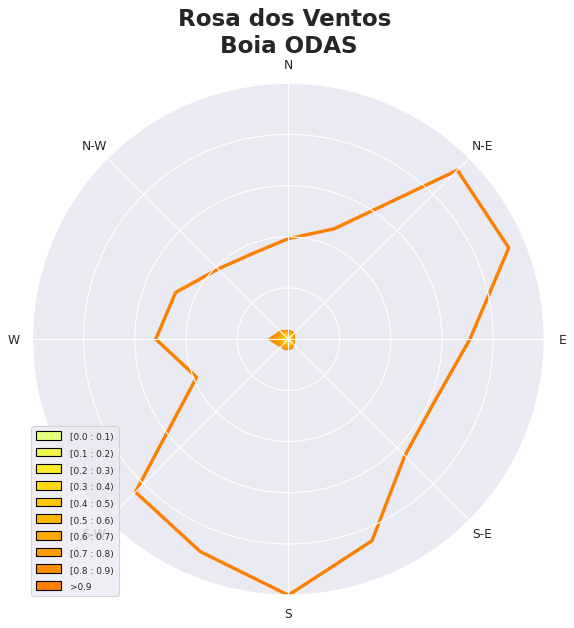

In [10]:
cs = odas_meteorologia['Velocidade do Vento [m/s]'].to_numpy()
cd = odas_meteorologia['Direção do Vento [°N]'].to_numpy()

df = pd.DataFrame({"speed": cs, "direction": cd})
plot_windrose(df, kind="contour", bins=np.arange(0, 1, 0.1), cmap=cm.get_cmap('Wistia'), lw=3)  # Use the colormap object

# Remover os textos do eixo radial (valores de magnitude)
plt.gca().set_yticklabels([])

# Ajustar o título
plt.title("Rosa dos Ventos \nBoia ODAS", fontsize='xx-large', fontweight='bold')

# Ajustar layout e mostrar
plt.savefig("Polar-ODAS-Meteorologia.pdf")
plt.tight_layout()
plt.show()

# Cattalini - Correntômetro

In [11]:
cattalini_corrente = p2mod['Cattalini_Corrente'].copy()
filtered_cattalini_corrente = cattalini_corrente[(cattalini_corrente["Datetime"] >= start_analysis) & (cattalini_corrente["Datetime"] < end_analysis)]

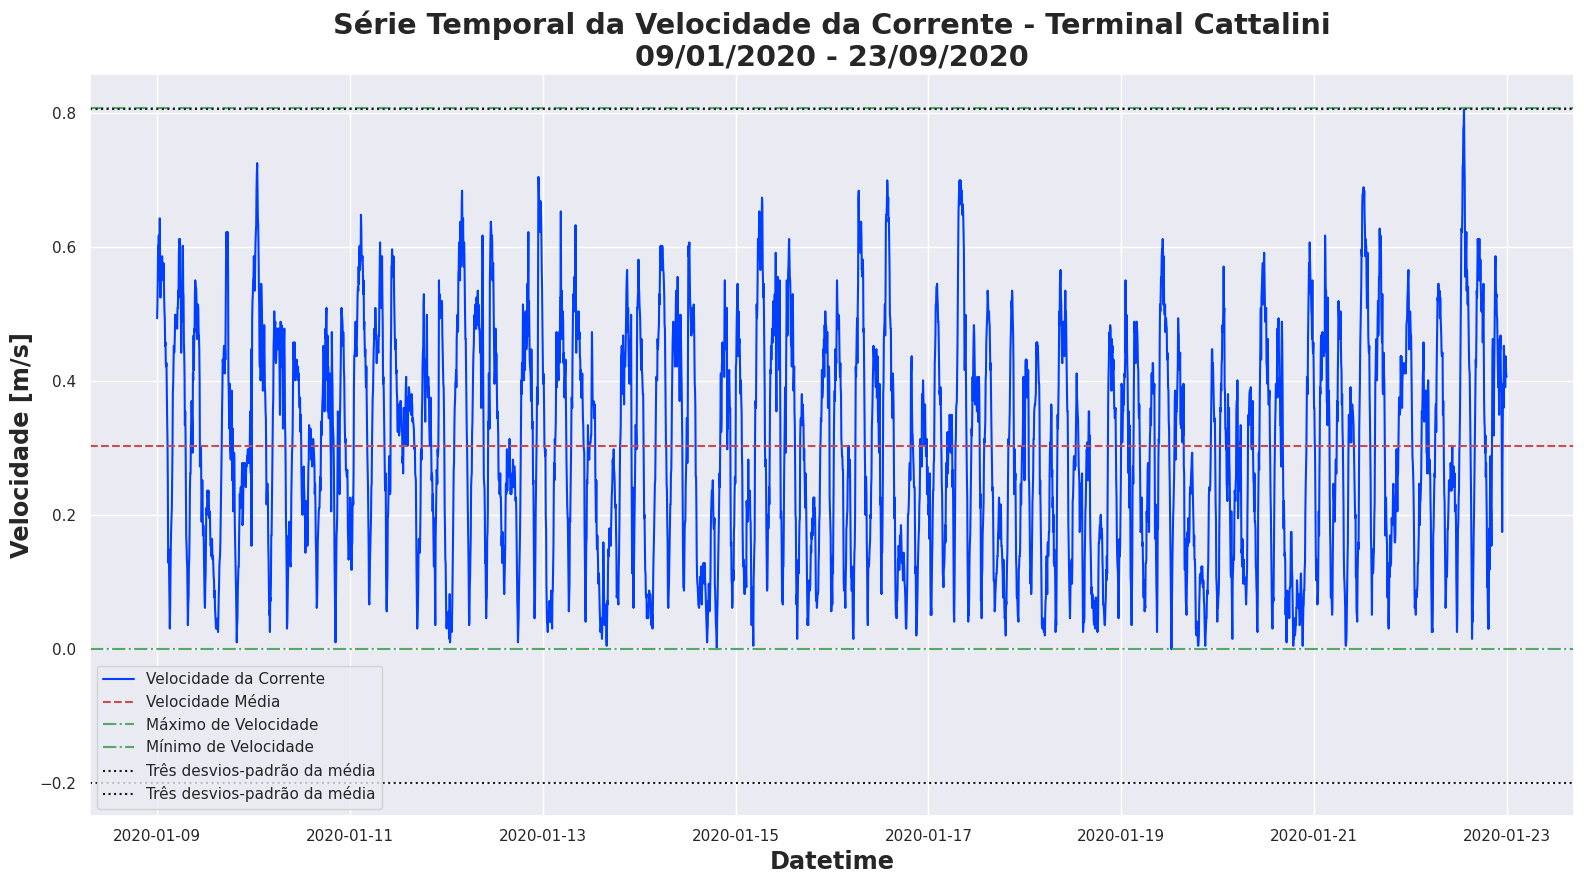

In [12]:
plt.plot(filtered_cattalini_corrente['Datetime'],
         filtered_cattalini_corrente['Velocidade 1 [m/s]'],
         label="Velocidade da Corrente")
plt.axhline(y=filtered_cattalini_corrente['Velocidade 1 [m/s]'].mean(),
            color='r', linestyle='--', label="Velocidade Média")
plt.axhline(y=filtered_cattalini_corrente['Velocidade 1 [m/s]'].max(),
            color='g', linestyle='-.', label="Máximo de Velocidade")
plt.axhline(y=filtered_cattalini_corrente['Velocidade 1 [m/s]'].min(),
            color='g', linestyle='-.', label="Mínimo de Velocidade")
plt.axhline(y=filtered_cattalini_corrente['Velocidade 1 [m/s]'].mean() + 3 * filtered_cattalini_corrente['Velocidade 1 [m/s]'].std(),
            color='k', linestyle=':', label="Três desvios-padrão da média")
plt.axhline(y=filtered_cattalini_corrente['Velocidade 1 [m/s]'].mean() -3 * filtered_cattalini_corrente['Velocidade 1 [m/s]'].std(),
            color='k', linestyle=':', label="Três desvios-padrão da média")

plt.xlabel('Datetime', fontsize='x-large', fontweight='bold')
plt.ylabel('Velocidade [m/s]', fontsize='x-large', fontweight='bold')
plt.title('Série Temporal da Velocidade da Corrente - Terminal Cattalini\n09/01/2020 - 23/09/2020', fontsize='xx-large', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('Velocidade-Cattalini-Corrente.pdf')
plt.show()

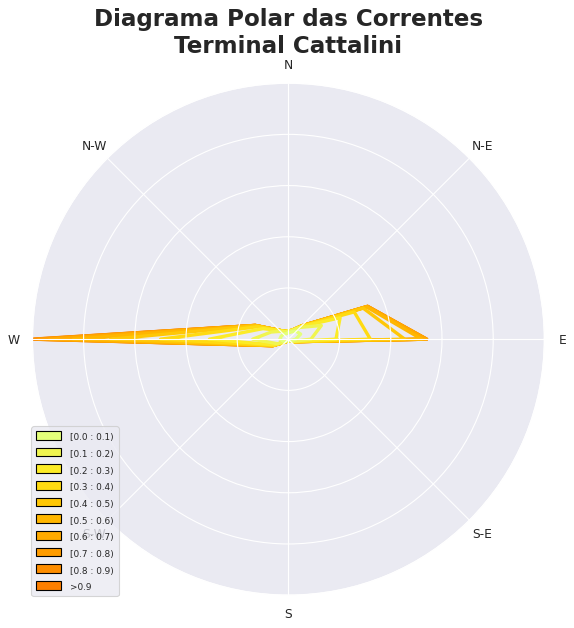

In [13]:
cs = cattalini_corrente['Velocidade 1 [m/s]'].to_numpy()
cd = cattalini_corrente['Direção 1 [°N]'].to_numpy()

df = pd.DataFrame({"speed": cs, "direction": cd})
plot_windrose(df, kind="contour", bins=np.arange(0, 1, 0.1), cmap=cm.get_cmap('Wistia'), lw=3)  # Use the colormap object

# Remover os textos do eixo radial (valores de magnitude)
plt.gca().set_yticklabels([])

# Ajustar o título
plt.title("Diagrama Polar das Correntes\nTerminal Cattalini", fontsize='xx-large', fontweight='bold')

# Ajustar layout e mostrar
plt.savefig("Polar-Cattalini-Corrente.pdf")
plt.tight_layout()
plt.show()

# Cattalini Meteorologia

In [14]:
cattalini_meteorologia = p2mod['Cattalini_Meteorologia'].copy()
filtered_cattalini_meteorologia = cattalini_meteorologia[(cattalini_meteorologia["Datetime"] >= start_analysis) & (cattalini_meteorologia["Datetime"] < end_analysis)]

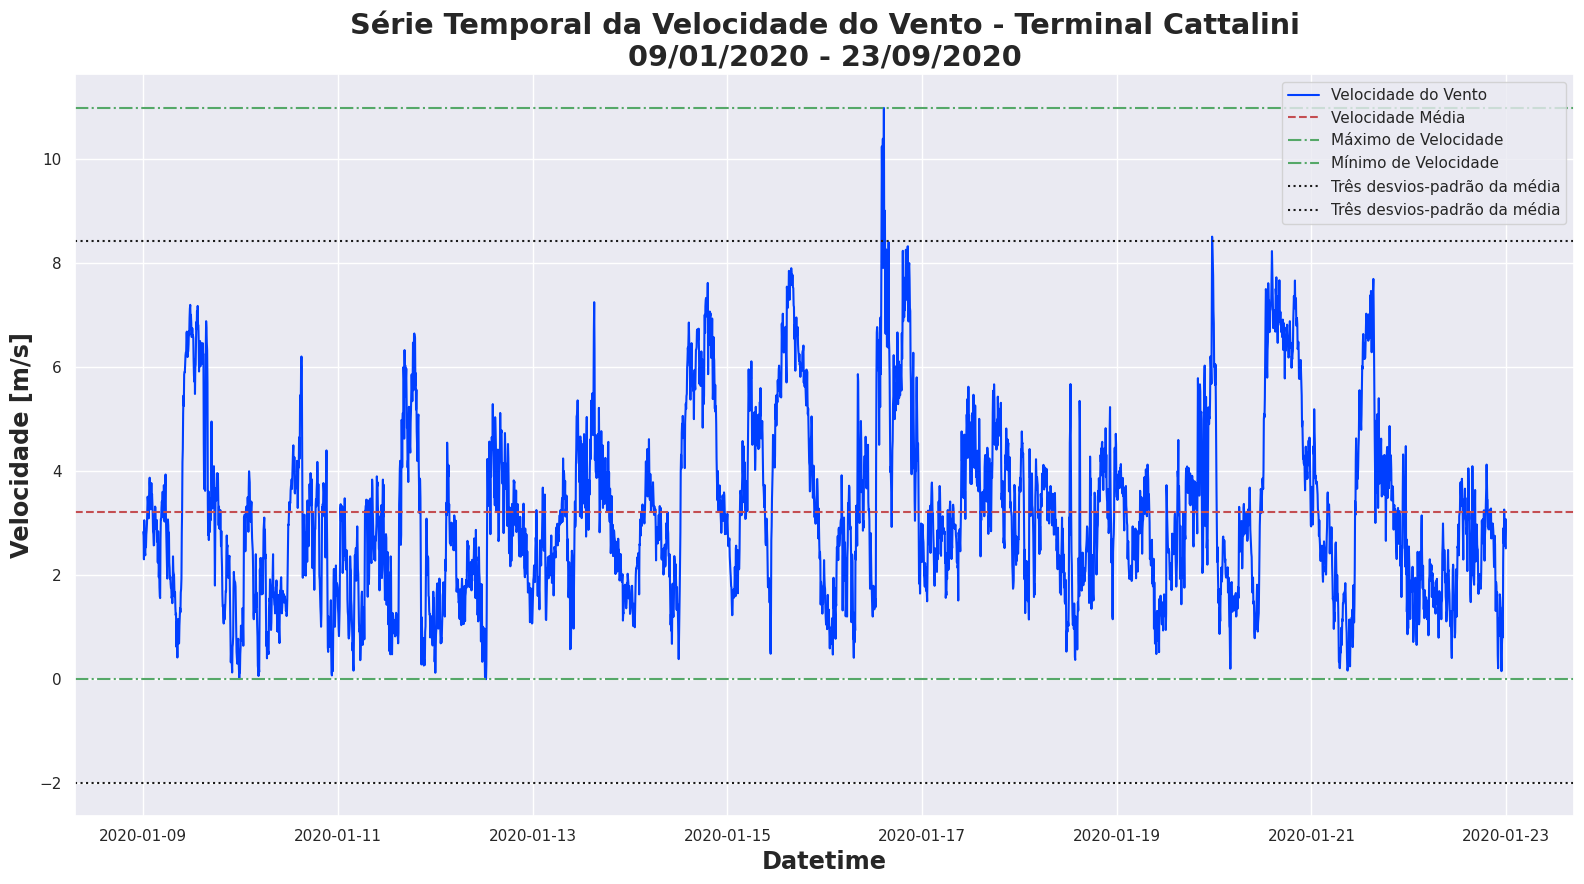

In [15]:
plt.plot(filtered_cattalini_meteorologia['Datetime'],
         filtered_cattalini_meteorologia['Velocidade do Vento [m/s]'],
         label="Velocidade do Vento")
plt.axhline(y=filtered_cattalini_meteorologia['Velocidade do Vento [m/s]'].mean(),
            color='r', linestyle='--', label="Velocidade Média")
plt.axhline(y=filtered_cattalini_meteorologia['Velocidade do Vento [m/s]'].max(),
            color='g', linestyle='-.', label="Máximo de Velocidade")
plt.axhline(y=filtered_cattalini_meteorologia['Velocidade do Vento [m/s]'].min(),
            color='g', linestyle='-.', label="Mínimo de Velocidade")
plt.axhline(y=filtered_cattalini_meteorologia['Velocidade do Vento [m/s]'].mean() + 3 * filtered_cattalini_meteorologia['Velocidade do Vento [m/s]'].std(),
            color='k', linestyle=':', label="Três desvios-padrão da média")
plt.axhline(y=filtered_cattalini_meteorologia['Velocidade do Vento [m/s]'].mean() -3 * filtered_cattalini_meteorologia['Velocidade do Vento [m/s]'].std(),
            color='k', linestyle=':', label="Três desvios-padrão da média")

plt.xlabel('Datetime', fontsize='x-large', fontweight='bold')
plt.ylabel('Velocidade [m/s]', fontsize='x-large', fontweight='bold')
plt.title('Série Temporal da Velocidade do Vento - Terminal Cattalini\n09/01/2020 - 23/09/2020', fontsize='xx-large', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('Velocidade-Cattalini-Meteorologia.pdf')
plt.show()

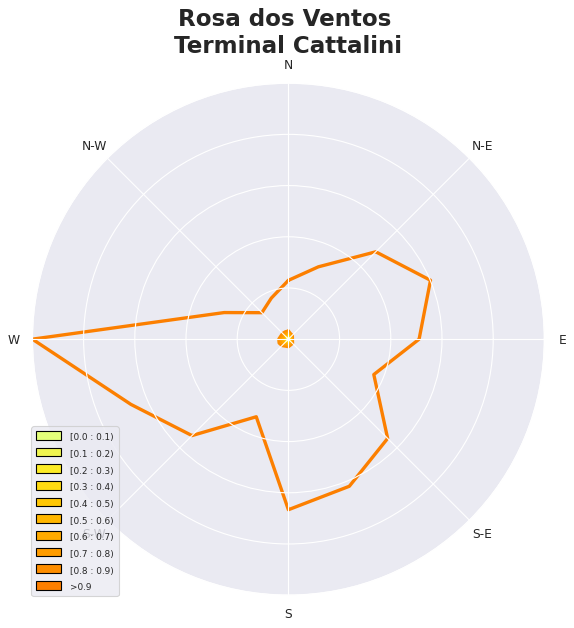

In [16]:
cs = cattalini_meteorologia['Velocidade do Vento [m/s]'].to_numpy()
cd = cattalini_meteorologia['Direção do Vento [°N]'].to_numpy()

df = pd.DataFrame({"speed": cs, "direction": cd})
plot_windrose(df, kind="contour", bins=np.arange(0, 1, 0.1), cmap=cm.get_cmap('Wistia'), lw=3)  # Use the colormap object

# Remover os textos do eixo radial (valores de magnitude)
plt.gca().set_yticklabels([])

# Ajustar o título
plt.title("Rosa dos Ventos \nTerminal Cattalini", fontsize='xx-large', fontweight='bold')

# Ajustar layout e mostrar
plt.savefig("Polar-Cattalini-Meteorologia.pdf")
plt.tight_layout()
plt.show()

# Cattalini Marégrafo

In [17]:
cattalini_maregrafo = p2mod['Cattalini_Maregrafo'].copy()
filtered_cattalini_maregrafo = cattalini_maregrafo[(cattalini_maregrafo["Datetime"] >= start_analysis) & (cattalini_maregrafo["Datetime"] < end_analysis)]

In [18]:
filtered_cattalini_maregrafo

,Datetime,Altura [m]
73702,2020-01-09 00:00:00+00:00,1.15
73703,2020-01-09 00:05:00+00:00,1.19
73704,2020-01-09 00:10:00+00:00,1.22
73705,2020-01-09 00:15:00+00:00,1.26
73706,2020-01-09 00:20:00+00:00,1.30
...,...,...
77690,2020-01-22 23:35:00+00:00,1.19
77691,2020-01-22 23:40:00+00:00,1.22
77692,2020-01-22 23:45:00+00:00,1.25
77693,2020-01-22 23:50:00+00:00,1.28


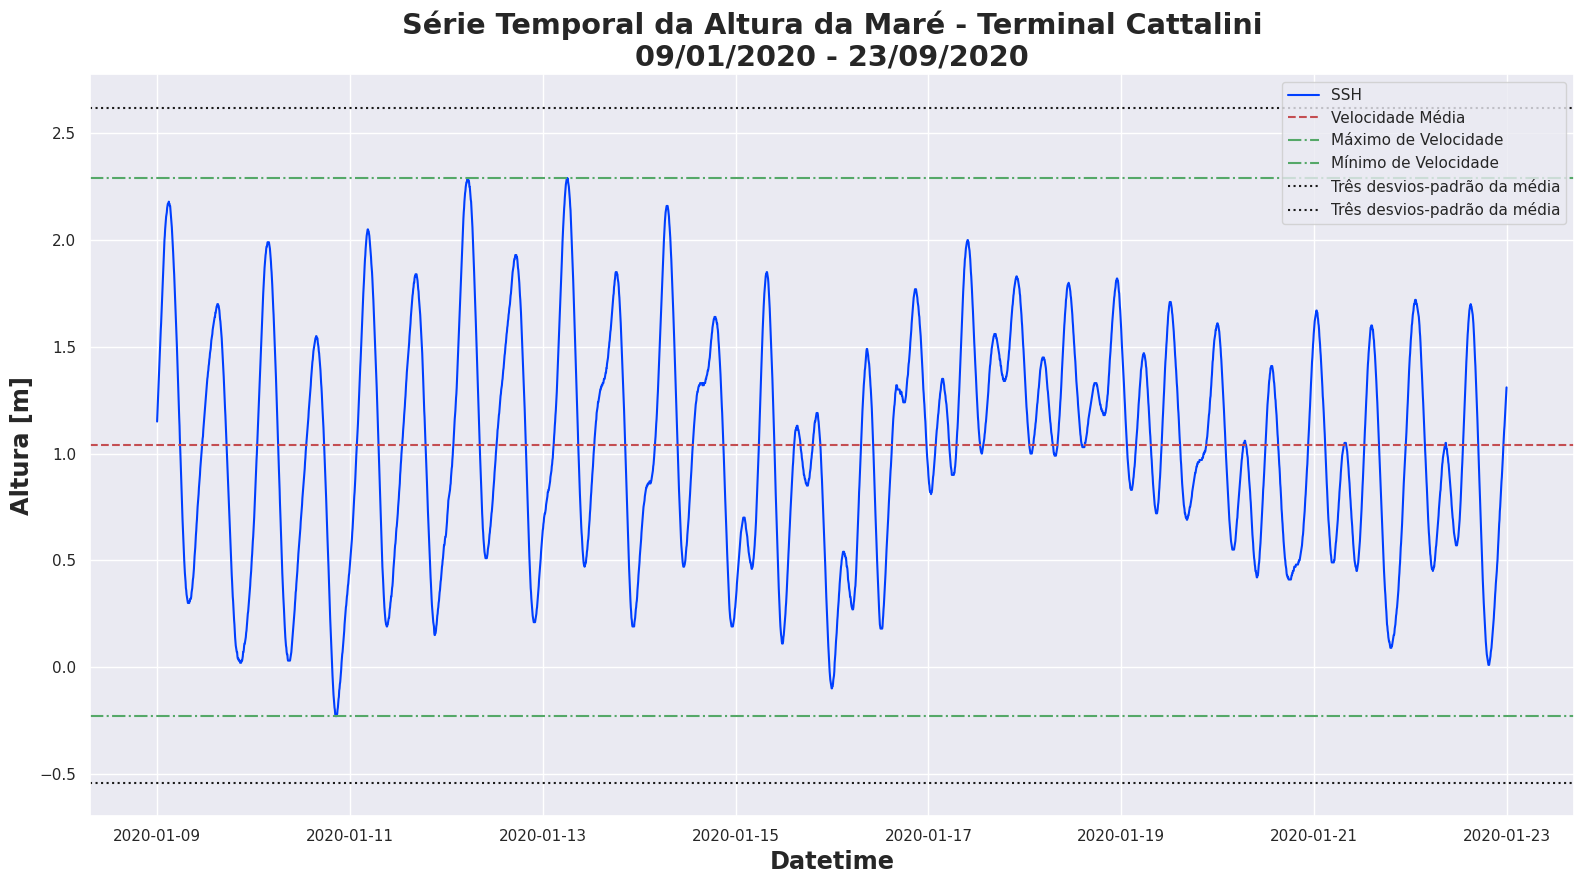

In [19]:
plt.plot(filtered_cattalini_maregrafo['Datetime'],
         filtered_cattalini_maregrafo['Altura [m]'],
         label="SSH")
plt.axhline(y=filtered_cattalini_maregrafo['Altura [m]'].mean(),
            color='r', linestyle='--', label="Velocidade Média")
plt.axhline(y=filtered_cattalini_maregrafo['Altura [m]'].max(),
            color='g', linestyle='-.', label="Máximo de Velocidade")
plt.axhline(y=filtered_cattalini_maregrafo['Altura [m]'].min(),
            color='g', linestyle='-.', label="Mínimo de Velocidade")
plt.axhline(y=filtered_cattalini_maregrafo['Altura [m]'].mean() + 3 * filtered_cattalini_maregrafo['Altura [m]'].std(),
            color='k', linestyle=':', label="Três desvios-padrão da média")
plt.axhline(y=filtered_cattalini_maregrafo['Altura [m]'].mean() -3 * filtered_cattalini_maregrafo['Altura [m]'].std(),
            color='k', linestyle=':', label="Três desvios-padrão da média")

plt.xlabel('Datetime', fontsize='x-large', fontweight='bold')
plt.ylabel('Altura [m]', fontsize='x-large', fontweight='bold')
plt.title('Série Temporal da Altura da Maré - Terminal Cattalini\n09/01/2020 - 23/09/2020', fontsize='xx-large', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('Cattalini-SSH.pdf')
plt.show()

# Porto de Paranaguá

In [20]:
porto_maregrafo = p2mod['Porto_Maregrafo'].copy()
filtered_porto_maregrafo = porto_maregrafo[(porto_maregrafo["Datetime"] >= start_analysis) & (porto_maregrafo["Datetime"] < end_analysis)]

porto_harmonico = p2mod['Porto_Harmonico'].copy()
filtered_porto_harmonico = porto_harmonico[(porto_harmonico["Datetime"] >= start_analysis) & (porto_harmonico["Datetime"] < end_analysis)]

porto_astronomica = p2mod['Porto_Astronomica'].copy()
filtered_porto_astronomica = porto_astronomica[(porto_astronomica["Datetime"] >= start_analysis) & (porto_astronomica["Datetime"] < end_analysis)]

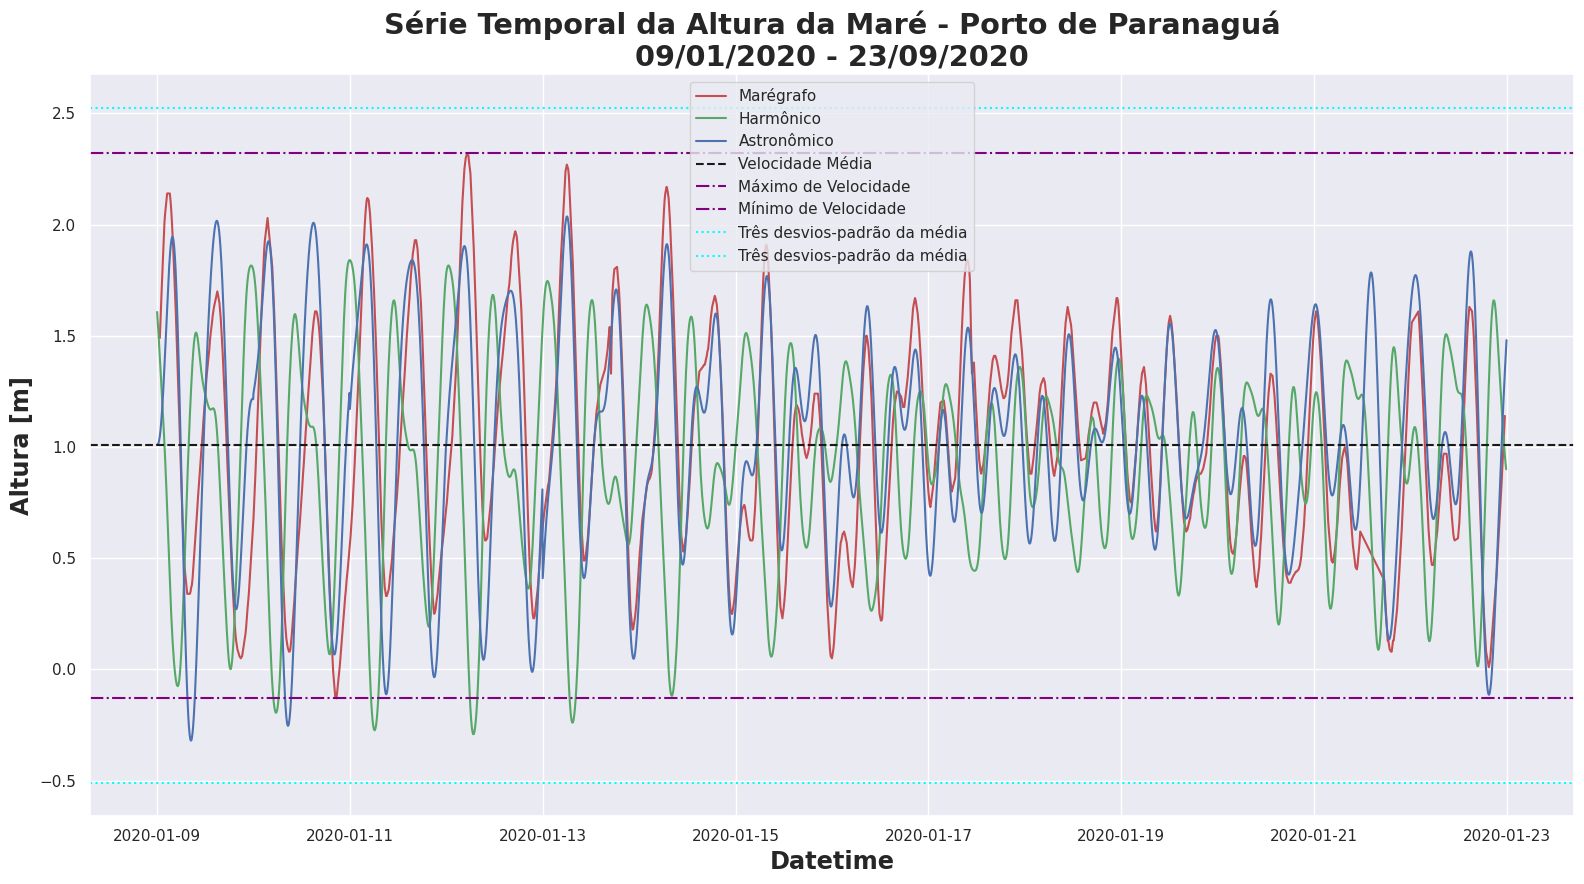

In [21]:
plt.plot(filtered_porto_maregrafo['Datetime'],
         filtered_porto_maregrafo['Altura [m]'],
         label="Marégrafo", color='r')

plt.plot(filtered_porto_harmonico['Datetime'],
         filtered_porto_harmonico['SSH [m]'],
         label="Harmônico", color='g')

plt.plot(filtered_porto_astronomica['Datetime'],
         filtered_porto_astronomica['Altura [m]'],
         label="Astronômico", color='b')

plt.axhline(y=filtered_porto_maregrafo['Altura [m]'].mean(),
            color='k', linestyle='--', label="Velocidade Média")
plt.axhline(y=filtered_porto_maregrafo['Altura [m]'].max(),
            color='purple', linestyle='-.', label="Máximo de Velocidade")
plt.axhline(y=filtered_porto_maregrafo['Altura [m]'].min(),
            color='purple', linestyle='-.', label="Mínimo de Velocidade")
plt.axhline(y=filtered_porto_maregrafo['Altura [m]'].mean() + 3 * filtered_porto_maregrafo['Altura [m]'].std(),
            color='cyan', linestyle=':', label="Três desvios-padrão da média")
plt.axhline(y=filtered_porto_maregrafo['Altura [m]'].mean() -3 * filtered_porto_maregrafo['Altura [m]'].std(),
            color='cyan', linestyle=':', label="Três desvios-padrão da média")

plt.xlabel('Datetime', fontsize='x-large', fontweight='bold')
plt.ylabel('Altura [m]', fontsize='x-large', fontweight='bold')
plt.title('Série Temporal da Altura da Maré - Porto de Paranaguá\n09/01/2020 - 23/09/2020', fontsize='xx-large', fontweight='bold')
plt.legend()
plt.tight_layout()
plt.savefig('Porto-Paranagua-SSH.pdf')
plt.show()

# Extra

In [22]:
# Código Dummy só para gerar algumas estatísticas
# Variar o i para determinado conjunto de dados 0 -> 5
# Variar o argumento de freq para frequência estimada por humano
# Ao checar as primeiras e últimas linhas dos dataframes

freq_estimadas = ["10min", "5min", "10min", "1min",
                  "5min", "5min", "5min", "10min"]

start_date = pd.to_datetime("2019-04-25 19:30:00+00:00")
end_date = pd.to_datetime("2021-12-08 15:00:00+00:00")

for i, (key, df) in enumerate(p2mod.items()):
    print(f"Conjunto de Dados.....: {key}")
    print(f"Frequência Estimada...: {freq_estimadas[i]}")
    print(f"Número de Dados.......: {len(df)}")
    print(f"Número Estimado.......: {len(pd.date_range(start=start_date, end=end_date, freq=freq_estimadas[i]))}")
    print(f"Porcentagem de Falta..: {(1 - len(df) / len(pd.date_range(start=start_date, end=end_date, freq=freq_estimadas[i]))) * 100:.3f}%")
    print()

Conjunto de Dados.....: ODAS_Corrente
Frequência Estimada...: 10min
Número de Dados.......: 113094
Número Estimado.......: 137926
Porcentagem de Falta..: 18.004%

Conjunto de Dados.....: Cattalini_Corrente
Frequência Estimada...: 5min
Número de Dados.......: 273245
Número Estimado.......: 275851
Porcentagem de Falta..: 0.945%

Conjunto de Dados.....: ODAS_Meteorologia
Frequência Estimada...: 10min
Número de Dados.......: 104792
Número Estimado.......: 137926
Porcentagem de Falta..: 24.023%

Conjunto de Dados.....: Cattalini_Meteorologia
Frequência Estimada...: 1min
Número de Dados.......: 594571
Número Estimado.......: 1379251
Porcentagem de Falta..: 56.892%

Conjunto de Dados.....: Cattalini_Maregrafo
Frequência Estimada...: 5min
Número de Dados.......: 273223
Número Estimado.......: 275851
Porcentagem de Falta..: 0.953%

Conjunto de Dados.....: Porto_Maregrafo
Frequência Estimada...: 5min
Número de Dados.......: 204582
Número Estimado.......: 275851
Porcentagem de Falta..: 25.836%

C

<Figure size 1600x900 with 0 Axes>

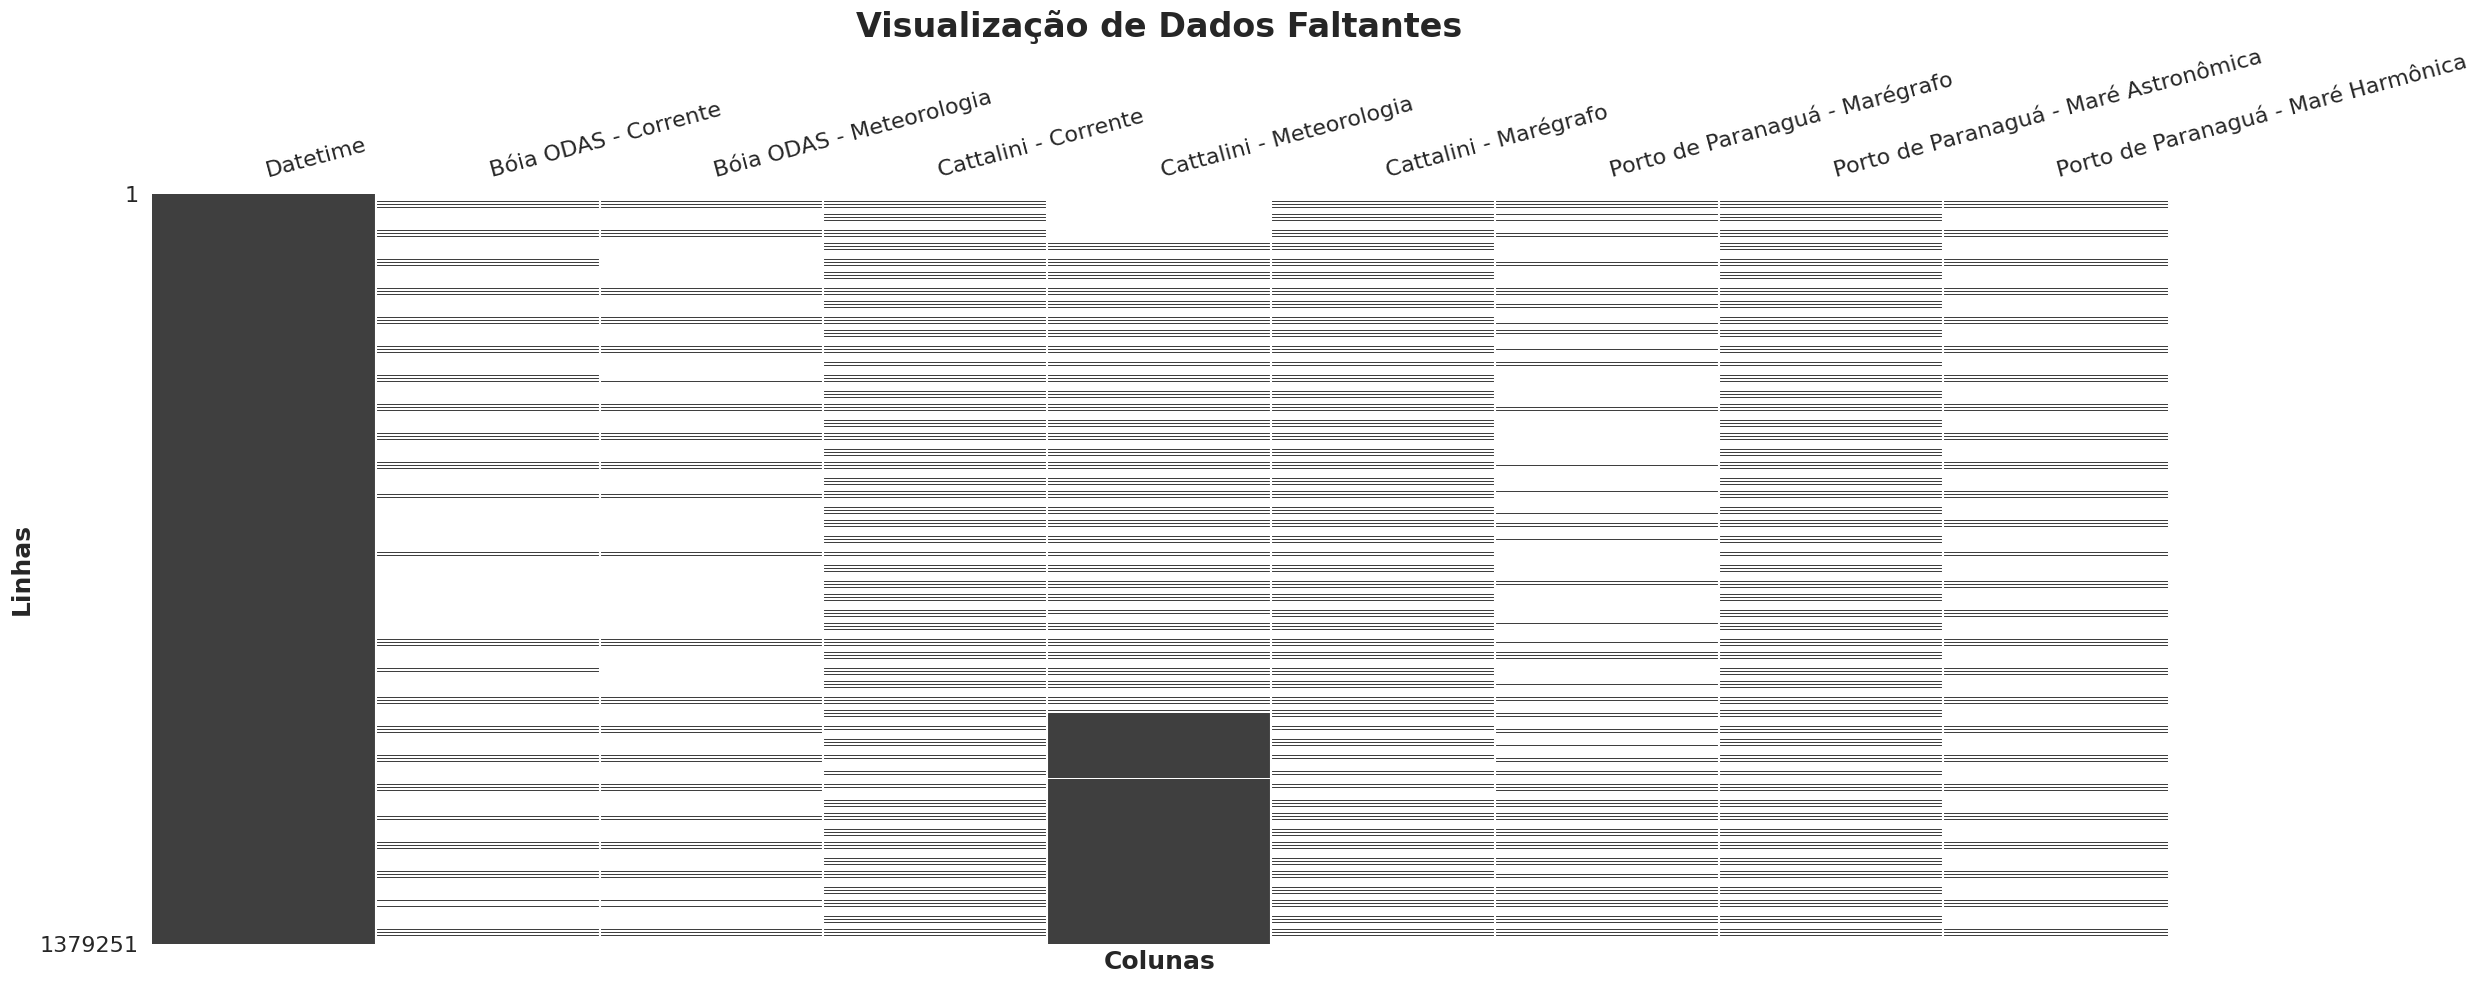

In [25]:
def plot_missing_data(df):
    """
    Plota a visualização dos dados faltantes de forma estilizada.

    Parâmetros:
        df (DataFrame): O DataFrame a ser analisado.
    """
    # Estilizar o gráfico com cores personalizadas
    plt.figure(figsize=(16, 9))  # Tamanho da figura
    msno.matrix(df, sparkline=False)

    # Personalizar o fundo e o estilo
    plt.title("Visualização de Dados Faltantes", fontsize=24, fontweight='bold')
    plt.tick_params(axis='both', labelsize=16)
    plt.xticks(rotation=15)
    plt.xlabel("Colunas", fontsize=18, fontweight='bold')
    plt.ylabel("Linhas", fontsize=18, fontweight='bold')
    plt.grid(visible=False)  # Desativa a grade para maior clareza
    plt.tight_layout()
    plt.savefig("P2MOD-Missing-Data.pdf")
    plt.show()

# Uso com um DataFrame
plot_missing_data(p2mod_visualization)

NameError: name 'data_list' is not defined

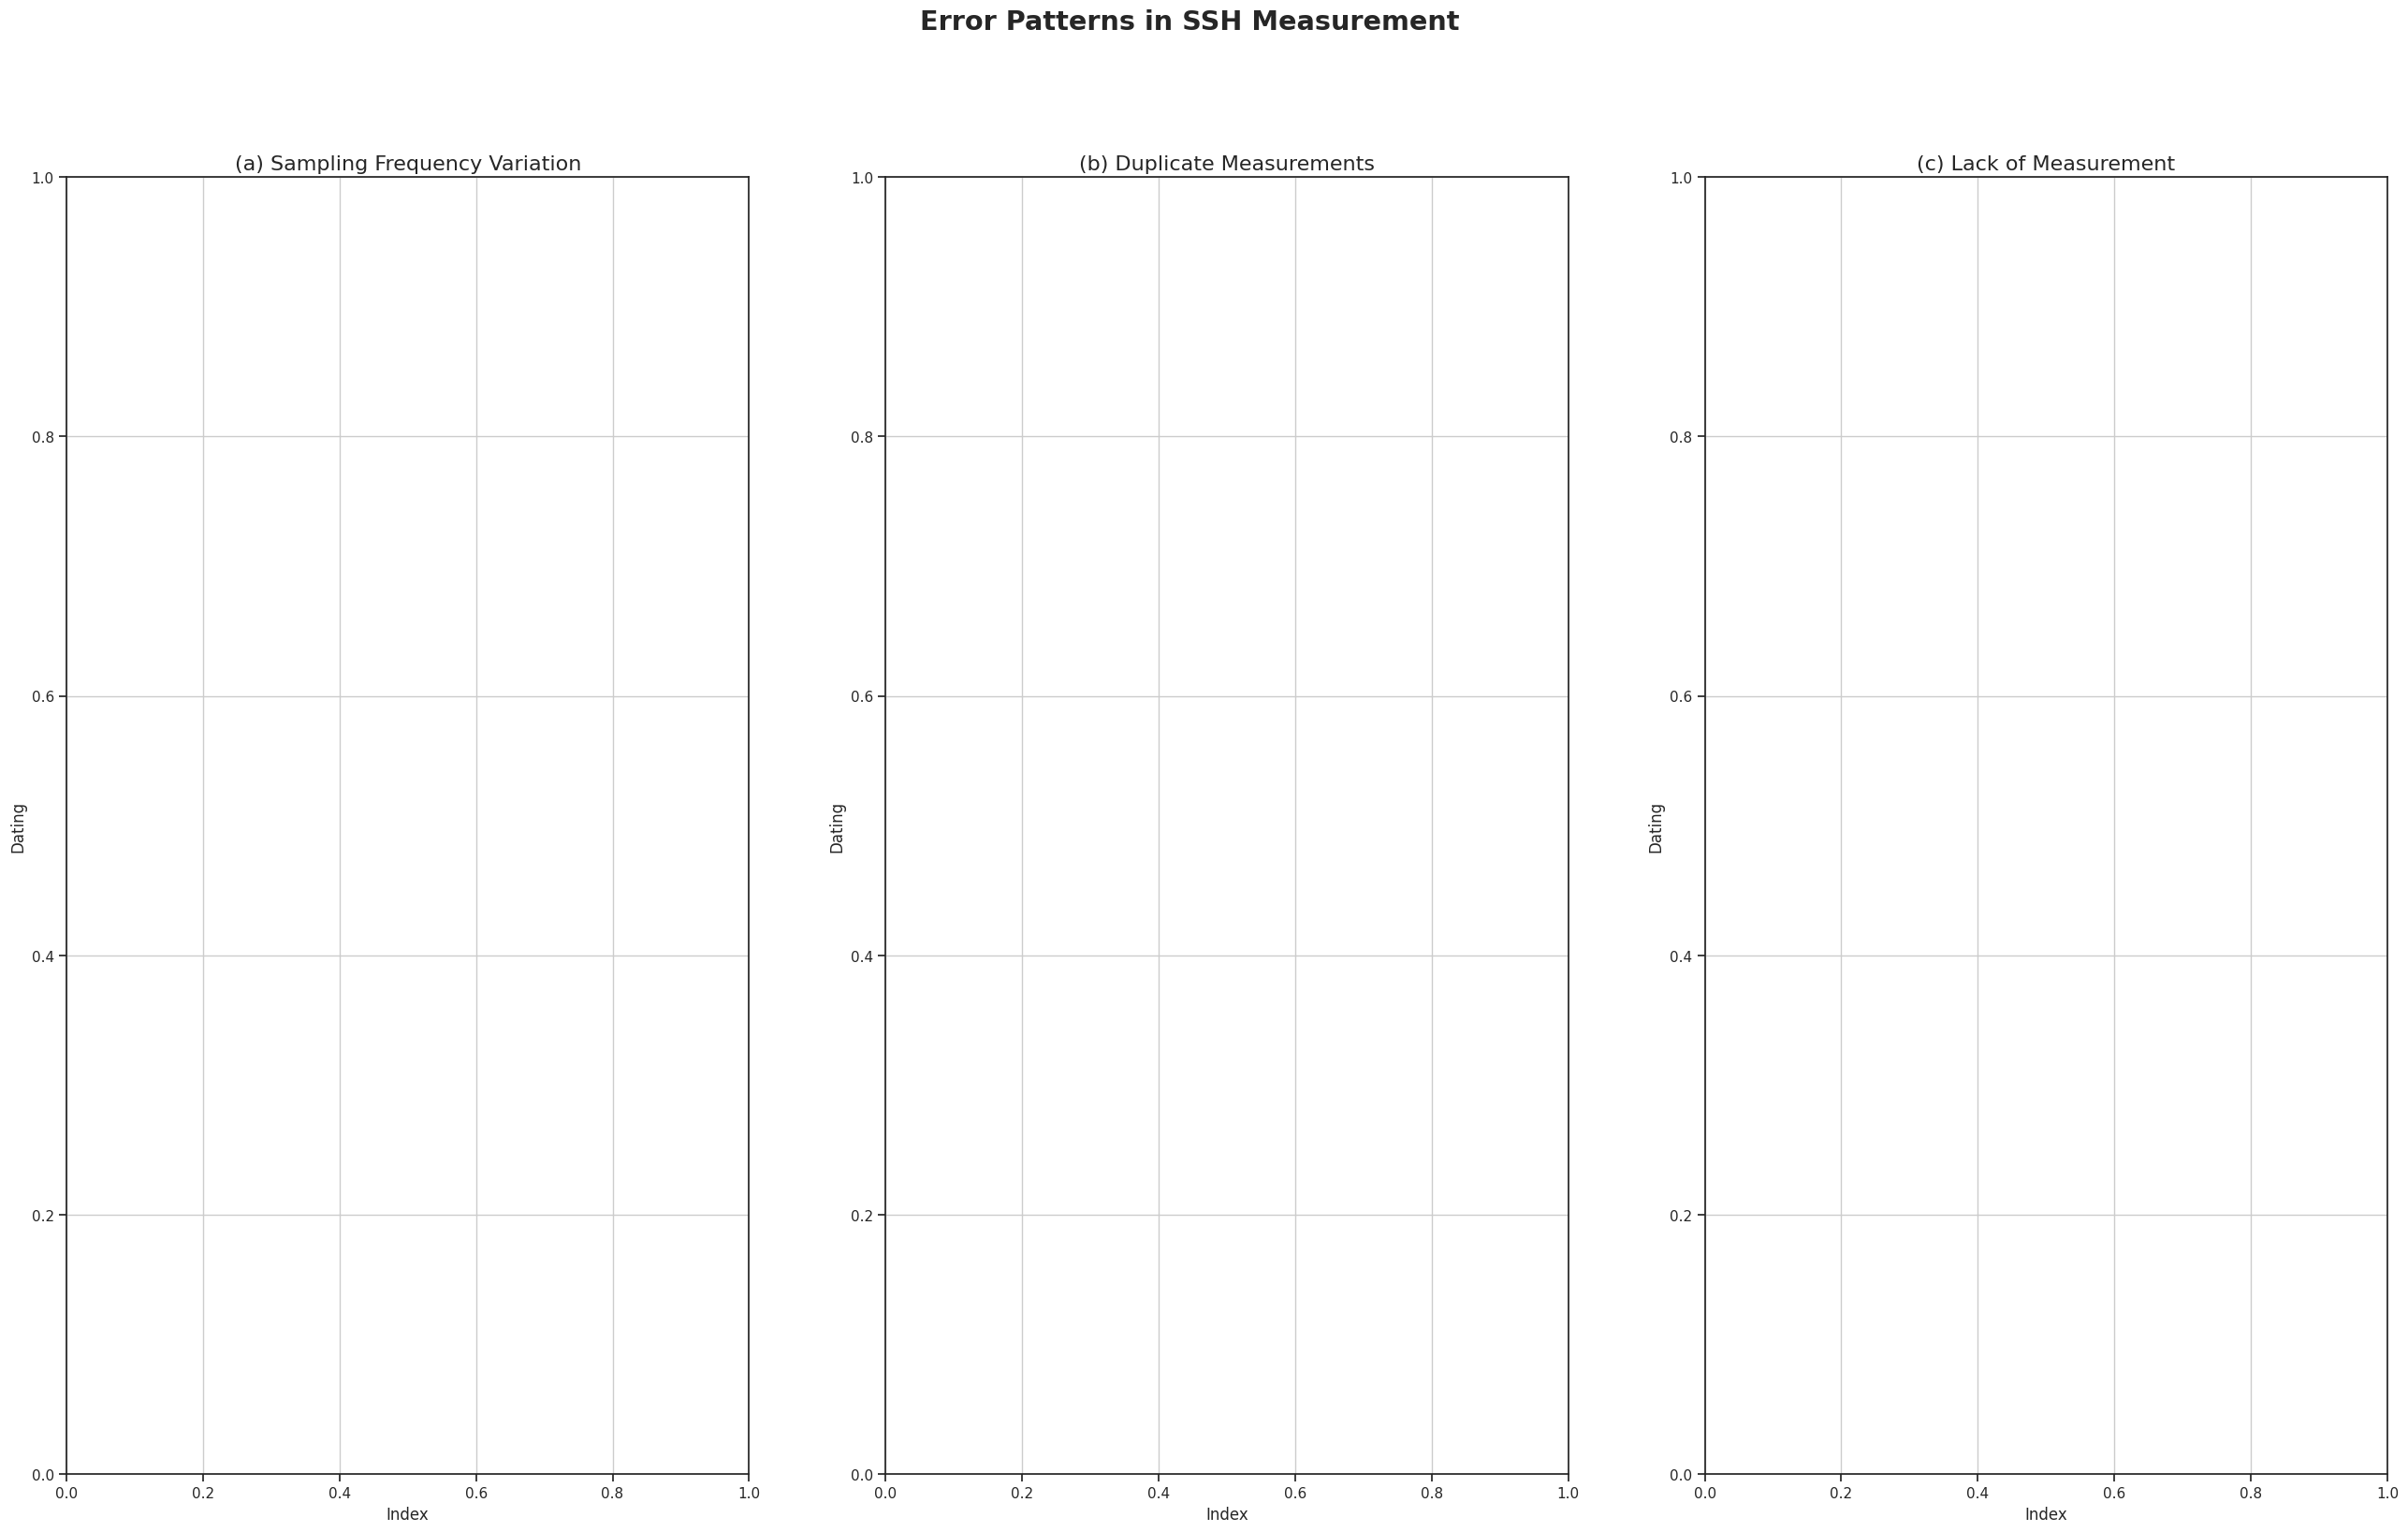

In [24]:
min_part_0 = 8000
max_part_0 = 20000

min_part_1 = 6705
max_part_1 = 6760

min_part_2 = 7525
max_part_2 = 7575

custom_params = {'figure.figsize': (32, 18),
                 'axes.grid' : True}

sns.set_theme(style="ticks", rc=custom_params)

fig, ax = plt.subplots(nrows=1, ncols=3)

fig.suptitle("Error Patterns in SSH Measurement", size="xx-large", weight="bold")
palette = sns.color_palette("bright", 3)

ax[0].set_title(f"(a) Sampling Frequency Variation", fontsize=16)
ax[1].set_title(f"(b) Duplicate Measurements", fontsize=16)
ax[2].set_title(f"(c) Lack of Measurement", fontsize=16)

ax[0].set_xlabel(f"Index")
ax[1].set_xlabel(f"Index")
ax[2].set_xlabel(f"Index")

ax[0].set_ylabel(f"Dating")
ax[1].set_ylabel(f"Dating")
ax[2].set_ylabel(f"Dating")

part_0 = data_list[3]['datetime'][min_part_0 : max_part_0]
part_1 = data_list[3]['datetime'][min_part_1 : max_part_1]
part_2 = data_list[3]['datetime'][min_part_2 : max_part_2]

sns.lineplot(x=np.arange(min_part_0, max_part_0), y=part_0, color=palette[0], ax=ax[0])
sns.lineplot(x=np.arange(min_part_1, max_part_1), y=part_1, color=palette[1], ax=ax[1])
sns.lineplot(x=np.arange(min_part_2, max_part_2), y=part_2, color=palette[2], ax=ax[2])

plt.tight_layout()
plt.savefig('Error-patterns.pdf', dpi=300, bbox_inches='tight')
plt.show()